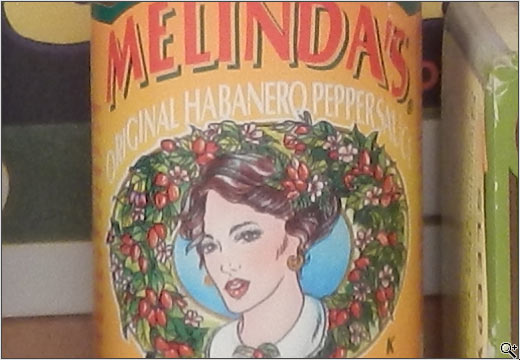

In [3]:
import cv2 
import os
import sys
import numpy as np 
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt 
from math import log10, sqrt
import time 
figsize = (10, 10) 
img = cv2.imread("479.jpg",1)


cv2_imshow(img)

In [4]:
def filter_img(input):  
  img = cv2.imread(input)
  cv2_imshow(img)

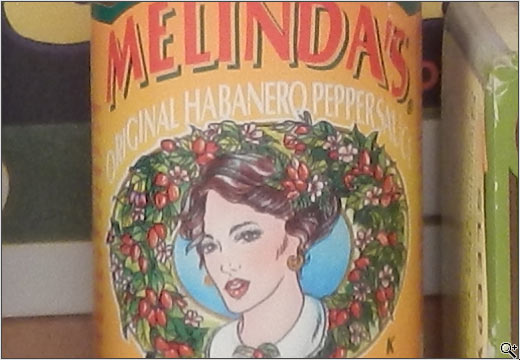

In [5]:
filter_img("479.jpg")


In [6]:
def plot_im(img, title):
    plt.figure(figsize=figsize)
    plt.imshow(img.astype('uint8'))
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

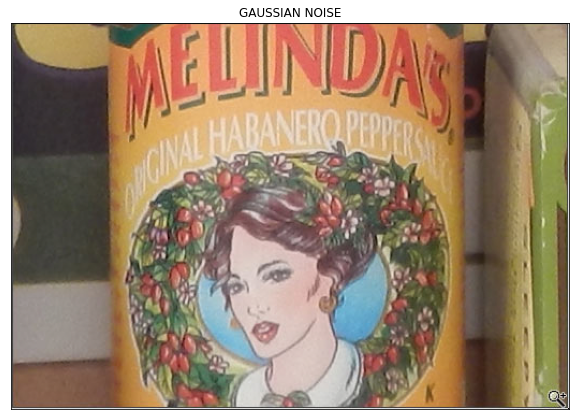

In [33]:



img= cv2.imread("479.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



row,col,ch= img.shape #Stores the shape of the image
mean = 0    #Mean (“centre”) of the distribution
var = 0.005   #Standard deviation (spread or “width”) of the distribution. 
gauss = np.random.normal(mean,var,(row,col,ch))
gauss = gauss.reshape(row,col,ch) #Returns an array containing the same data with a new shape
gauss_noisy = img + gauss

np.random.seed(1234)

plot_im(gauss_noisy,"GAUSSIAN NOISE")
#plt.figure(figsize=figsize)
#plt.imshow(gauss_noise_im)
#plt.title("original image + gaussian noise")
#plt.show()
#mse1 = ((img - gauss_noisy)**2).mean(axis=None)
#print("MSE of original image + gaussian noise = ", mse1)

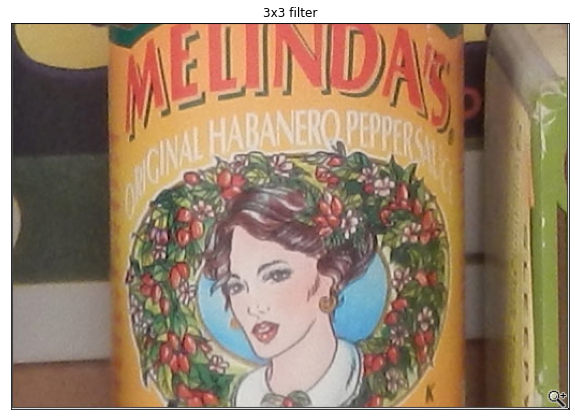

MSE of original filtered by a 3x3 filter =  2.5046212483167868e-05


In [15]:

Kernel1 = np.array([[0,0,0],[0,1,0],[0,0,0]]) #3x3

filter1 = cv2.filter2D(gauss_noisy, -1, Kernel1) 

plot_im(filter1,"3x3 filter")

mse2 = ((img - filter1)**2).mean(axis=None)
print("MSE of original filtered by a 3x3 filter = ", mse2)

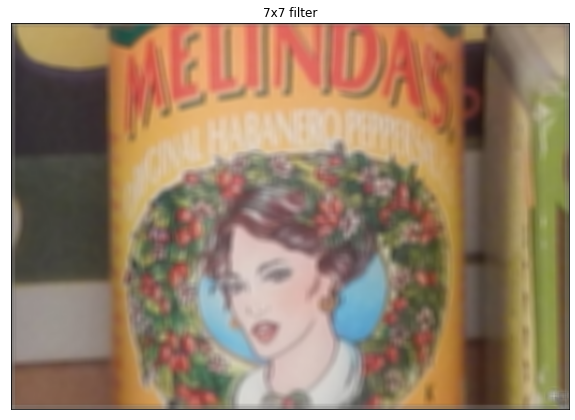

MSE of original filtered by a 7x7 filter =  363.8571896638806


In [17]:
Kernel2 = np.ones((7, 7)) / (7 ** 2) #7x7
filter2 = cv2.filter2D(gauss_noisy, -1, Kernel2) 
plot_im(filter2,"7x7 filter")
mse3 = ((img - filter2)**2).mean(axis=None)
print("MSE of original filtered by a 7x7 filter = ", mse3)

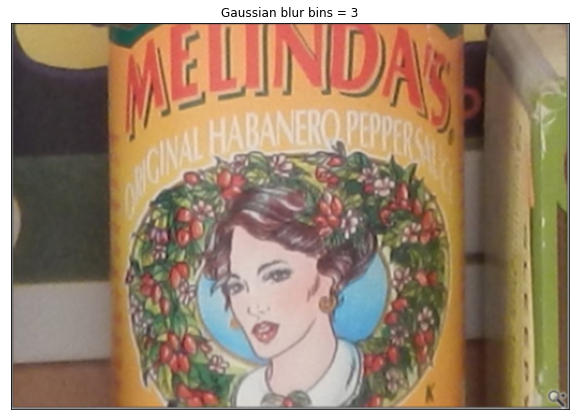

MSE of original filtered by gaussian filter(3) =  110.47663272214847


In [19]:
n = 3
filt_gauss1 = cv2.GaussianBlur(gauss_noisy,(n,n),0)
plot_im(filt_gauss1,"Gaussian blur bins = 3")
mse4 = ((img - filt_gauss1)**2).mean(axis=None)
print("MSE of original filtered by gaussian filter(3) = ", mse4)

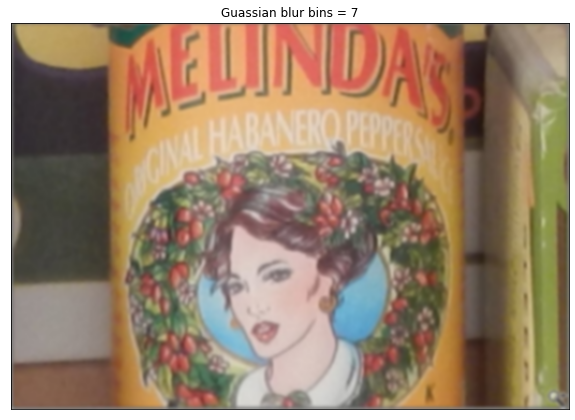

MSE of original filtered by gaussian filter(7) =  363.8571896638806


In [20]:
n = 7
filt_gauss2 = cv2.GaussianBlur(gauss_noisy,(n,n),0)
plot_im(filt_gauss2,"Guassian blur bins = 7")
mse5 = ((img - filter2)**2).mean(axis=None)
print("MSE of original filtered by gaussian filter(7) = ", mse5)

In [31]:
def PSNR(original, noise_reduced,mse):   
	if(mse < 0.01): # MSE is almost zero means no noise is present in the signal .
				# Therefore PSNR have no importance.
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr


value = PSNR(img, filter1, mse2) #PSNR for original with the 3x3 filter
print(f"PSNR value is {value} dB")

value = PSNR(img, filter2,mse3) #PSNR for original with the 7x7 filter
print(f"PSNR value is {value} dB")

PSNR value is 100 dB
PSNR value is 22.52149400050729 dB


In [32]:
print("The 3x3 filter is the best filter because it has the larger psnr value")


The 3x3 filter is the best filter because it has the larger psnr value


In [25]:
#S&P function to be called

def s_and_p_noise(image, s_p_ratio=0.05): 
    out = np.copy(image)

    # Salt mode
    mask = np.random.rand(image.shape[0], image.shape[1]) <= s_p_ratio / 2
    out[mask] = 255

    # Pepper mode
    mask = np.random.rand(image.shape[0], image.shape[1]) <= s_p_ratio / 2
    out[mask] = 0
    return out




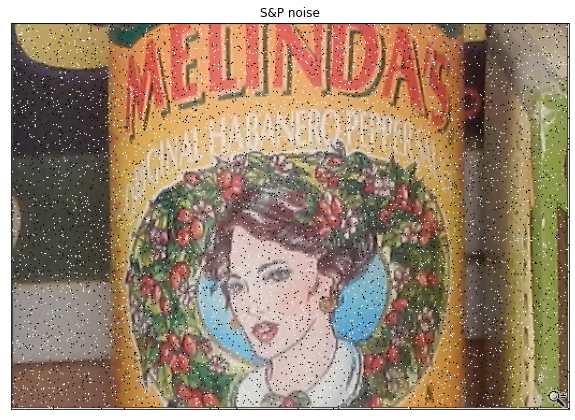

MSE of original + Salt & Pepper noise  =  5.348853276353276


In [26]:
s_p_noise_im = s_and_p_noise(img, s_p_ratio=0.05)
#plt.figure(figsize=figsize)
plot_im(s_p_noise_im,"S&P noise")
#plt.title("original image + s&p noise")
#plt.show()

mse6 = ((img - s_p_noise_im)**2).mean(axis=None)
print("MSE of original + Salt & Pepper noise  = ", mse6)


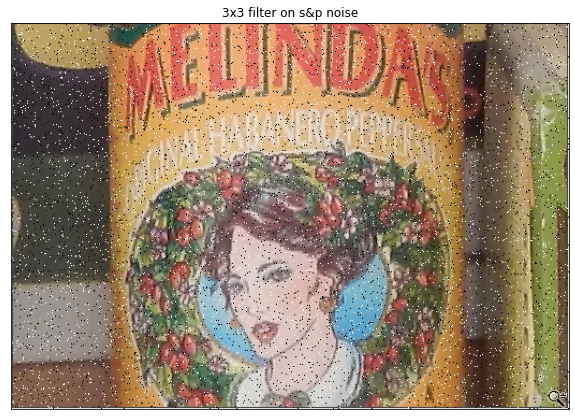

MSE of original filtered by a 3x3 filter =  5.348853276353276


In [28]:
filter3 = cv2.filter2D(s_p_noise_im, -1, Kernel1) #3x3
plot_im(filter3,"3x3 filter on s&p noise")
mse7= ((img - filter3)**2).mean(axis=None)
print("MSE of original filtered by a 3x3 filter = ", mse7)

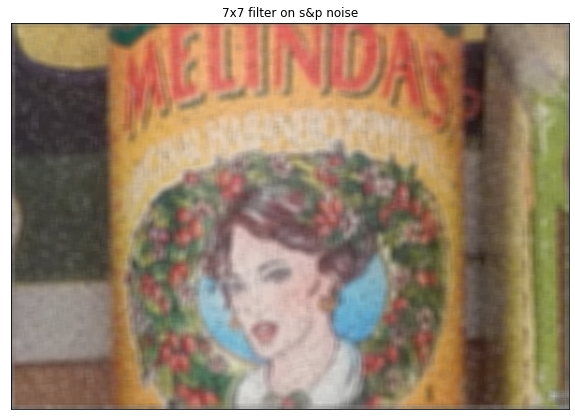

MSE of original filtered by a  7x7 filter =  60.74255341880342


In [30]:
Kernel2 = np.ones((7, 7)) / (7 ** 2) #7x7
filter4 = cv2.filter2D(s_p_noise_im, -1, Kernel2) 
plot_im(filter4,"7x7 filter on s&p noise")

mse8 = ((img - filter4)**2).mean(axis=None)
print("MSE of original filtered by a  7x7 filter = ", mse8)

In [35]:
value = PSNR(img, filter3, mse5) #PSNR 3x3 
print(f"PSNR value is {value} dB")

value = PSNR(img, filter4,mse6) #PSNR 7x7
print(f"PSNR value is {value} dB")

PSNR value is 22.52149400050729 dB
PSNR value is 40.84819675880744 dB


In [34]:
print("The 7x7 filter is the best filter because it has a large psnr")

The 7x7 filter is the best filter because it has a large psnr


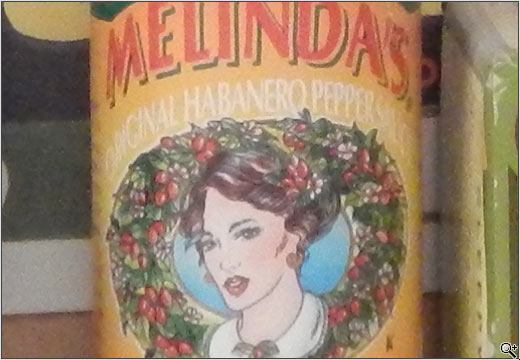

In [36]:
img2 = cv2.imread("482.jpg")

cv2_imshow(img2)

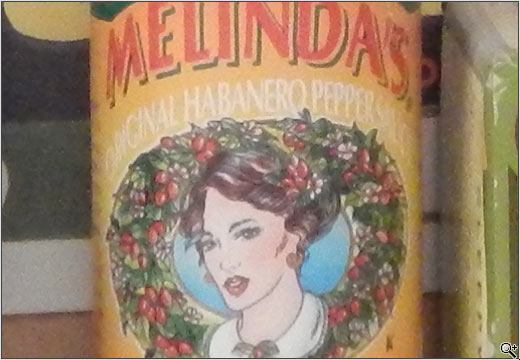

In [37]:
filter5= cv2.filter2D(img2, -1, Kernel1)#3x3
cv2_imshow(filter5)

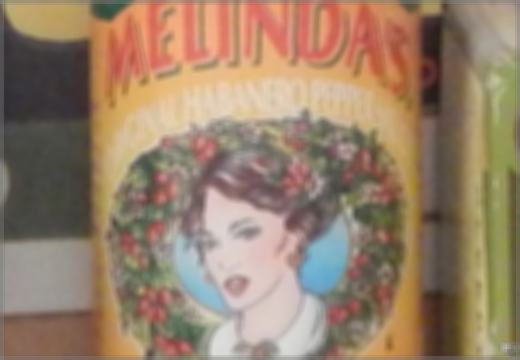

In [38]:
Kernel2 = np.ones((7, 7)) / (7 ** 2) #7x7
filter6 = cv2.filter2D(img2, -1, Kernel2)
cv2_imshow(filter6)